In [32]:
%pylab inline
from threading import Thread, Lock

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [33]:
lock = Lock()

def cluster(vertex, graph, groups, threadId, alpha = 1):
    n = graph.shape[0]  
    classified = zeros(n)
       
    internal_weights = graph[vertex].astype(float)    
    degrees = sum(graph, axis = 1)
    perimeter = sum(internal_weights)      
    classified[vertex] = 1
    area = internal_weights[vertex]
    
    lock.acquire()
    groups[vertex] *= threadId
    lock.release()
   
    while (sum(classified) < n): 
        temp_perimeter = perimeter - 2*internal_weights + degrees
        temp_area = area + internal_weights
        ratios = temp_area / (temp_perimeter + 0.000001) 
        next_vertex = np.argmax(ratios * np.logical_not(classified))
        this_alpha = (area*temp_perimeter[next_vertex])/(perimeter*temp_area[next_vertex]) 
        if(this_alpha > alpha):
            break
        classified[next_vertex] = 1
        internal_weights += graph[next_vertex]
        perimeter = temp_perimeter[next_vertex]
        area = temp_area[next_vertex]
        
        lock.acquire()
        groups[next_vertex] *= threadId
        lock.release()
        
        

In [30]:
A = array([[0,1,1,0,0,0],[1,0,1,0,0,0],[1,1,0,1,0,0],[0,0,1,0,1,1],[0,0,0,1,0,1],[0,0,0,1,1,0]])
output = array([1,1,1,1,1,1])
primes = [2,3,5]#,7,11,13,17,19]
threads = []
for p in primes:
    seed = np.random.randint(A.shape[0])
    print("Seed: "+str(seed))
    t = Thread(target = cluster, args =(seed, A, output, p))
    threads += [t]
    t.start()
for t in threads: 
    t.join()
output

Seed: 2
Seed: 4
Seed: 3


array([ 2,  2,  2, 15, 15, 15])

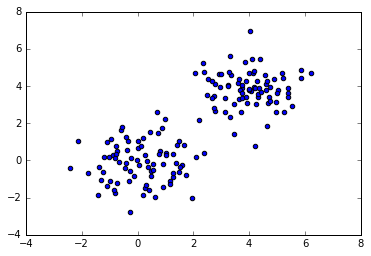

In [34]:
seed(123)
n = 160
x = randn(2*n).reshape(n,2)
for i in range(n//2,n):
    x[i][0] += 4
    x[i][1] += 4
def gauss_sim(x,y, sigma = 1):
    d = (x[0]-y[0])**2 + (x[1] - y[1])**2
    return np.exp(-d/(2*sigma))
adjacency = [[0 for i in range(n)] for j in range(n)]
for i in range(n):
    for j in range(i+1,n):
        g_s = gauss_sim(x[i],x[j])
        adjacency[i][j] = g_s
        adjacency[j][i] = g_s
scatter(x[:,0],x[:,1]);

In [37]:
A = array(adjacency)
output = ones(A.shape[0])
primes = [2,3,5,7]#,11,13,17,19]
threads = []
for p in primes:
    seed = np.random.randint(A.shape[0])
    print("Seed: "+str(seed))
    t = Thread(target = cluster, args =(seed, A, output, p))
    threads += [t]
    t.start()
for t in threads: 
    t.join()
output

Seed: 32
Seed: 136
Seed: 80
Seed: 69


array([ 14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  15.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,  14.,
        14.,  14.,  14.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,  15.,
        15.,  15.,  15.,  15.,  15.,  15.,  15.,  1